**Proyecto**

### 1. Analisis Exploratorio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomTreesEmbedding
#from sklearn.neural_network import BernoulliRBM

In [ ]:
#Read data
df0 = pd.read_csv("books.csv",error_bad_lines=False)
df0.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df0.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
#Eliminar espacios de los nombres de las columnas
df0.columns = df0.columns.str.strip()

In [ ]:
#Eliminar audio libros segun nuestros parametros
df = df0.loc[df0['num_pages']>=5]
df = df[~df['publisher'].str.contains("Audio",case=False)]
df = df.reset_index()

In [ ]:
#Agregar columna año (de publicacion)
fechas_buenas = []
for i in range(df.shape[0]):
  fecha = df["publication_date"][i].split("/")
  fechas_buenas.append(fecha[2])
df["año"] = fechas_buenas

In [ ]:
#Ver Idiomas
np.unique(df["language_code"])

array(['ale', 'ara', 'en-CA', 'en-GB', 'en-US', 'eng', 'enm', 'fre',
       'ger', 'gla', 'glg', 'grc', 'ita', 'jpn', 'lat', 'msa', 'mul',
       'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur', 'wel',
       'zho'], dtype=object)

In [ ]:
#Unificar ingles
df.loc[df["language_code"]=="en-CA","language_code"] = "eng"
df.loc[df["language_code"]=="en-GB","language_code"] = "eng"
df.loc[df["language_code"]=="en-US","language_code"] = "eng"
np.unique(df["language_code"])

array(['ale', 'ara', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc',
       'ita', 'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus',
       'spa', 'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

In [ ]:
df.head()

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,año
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [ ]:
df.describe()

,index,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10894.000000,10894.000000,10894.000000,1.089400e+04,10894.000000,1.089400e+04,10894.000000
mean,5563.496604,21322.944465,3.932981,9.759434e+12,343.070956,1.825570e+04,550.351386
std,3217.843280,13121.007365,0.351133,4.475971e+11,238.814227,1.135803e+05,2592.920915
min,0.000000,1.000000,0.000000,8.987060e+09,5.000000,0.000000e+00,0.000000
25%,2772.250000,10232.250000,3.770000,9.780345e+12,200.000000,1.130000e+02,9.000000
50%,5550.500000,20238.500000,3.960000,9.780571e+12,304.000000,7.895000e+02,48.000000
75%,8355.750000,32135.250000,4.130000,9.780871e+12,416.000000,5.160000e+03,245.000000
max,11122.000000,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


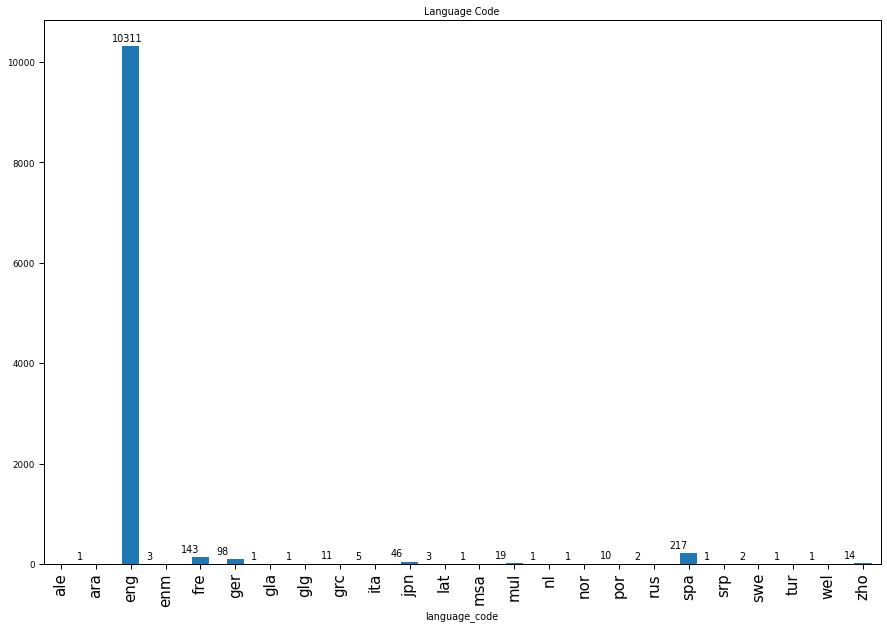

In [ ]:
#Grafico libros por idioma
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

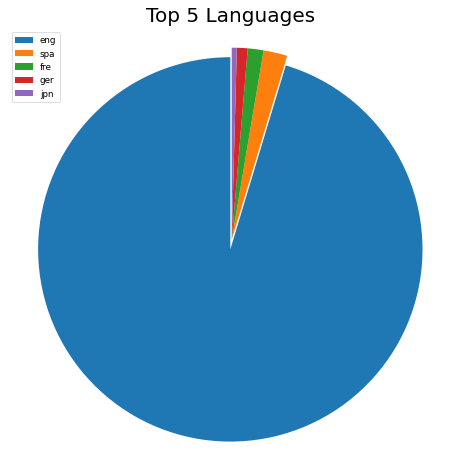

In [ ]:
### get df
lang_counts = pd.DataFrame(df.language_code.value_counts())
lang_counts = lang_counts.reset_index()
lang_counts = lang_counts.rename(columns={"index": "lang_code", "language_code": "counts"})
top_5_lang = lang_counts.sort_values(['counts'], ascending=False).head(5)

### set values
labels = top_5_lang.lang_code
counts = top_5_lang.counts
explode = (0.05, 0, 0, 0, 0) ### I want the most prominent language to be a little set apart when i view the pie.

### set figure and plot
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(counts,explode=explode, labels=None, shadow=False, startangle=90)
ax.axis('equal')
ax.set_title('Top 5 Languages', size=20)
plt.legend(labels, loc='upper left')
plt.legend(labels, loc='upper left')


plt.show()

<Figure size 1080x720 with 0 Axes>

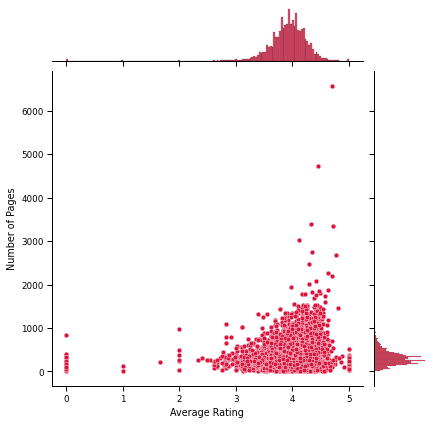

In [ ]:
#Grafico de numero de paginas vs nota promedio
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

<Figure size 1080x720 with 0 Axes>

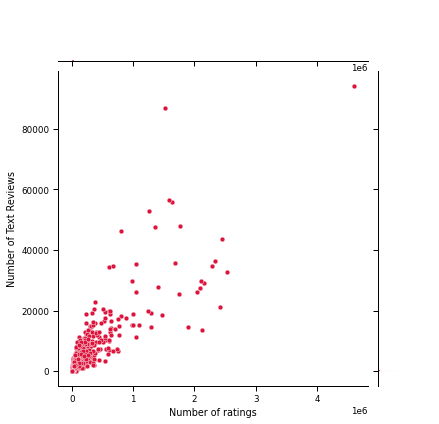

In [ ]:
# Grafico de cantidad de reseñas vs cantidad de votos

plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="ratings_count", y="text_reviews_count", data = df, color = 'crimson')
ax.set_axis_labels("Number of ratings", "Number of Text Reviews")

Mucha correlación:0

In [ ]:
# Funcion para identificar el primer autor
def primer_autor(text):
    arr = text.split('/')
    return arr[0]

In [ ]:
#Agregar columna primer autor
df['primer_autor'] = df['authors'].apply(lambda x : primer_autor(x))
total_rating = df.drop_duplicates(subset=['primer_autor', 'title'], keep='first')
total_rating = total_rating.groupby(by=['primer_autor']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating

,primer_autor,total_rating
3741,Stephen King,216.58
4148,William Shakespeare,178.45
2996,P.G. Wodehouse,170.11
1597,J.R.R. Tolkien,163.53
3526,Rumiko Takahashi,163.28
...,...,...
146,Andrew Hunt,0.00
1237,Frank N. Magill,0.00
3374,Robert A. Weiss,0.00
1256,Frederick P. Lenz,0.00


In [ ]:
#Se agrupa por autor en orden descendente segun libros escritos
total_book = df.groupby(by=['primer_autor']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book

,primer_autor,total_book
3741,Stephen King,54
4148,William Shakespeare,45
2996,P.G. Wodehouse,41
1684,James Patterson,40
2721,Mercedes Lackey,40
...,...,...
1723,Jane Robins,1
1725,Jane Walmsley,1
1726,Jane Werner Watson,1
1727,Jane Yolen,1


In [ ]:
#Parametro adjusted_rating mas "equilibrado" considerando cantidad de libros y sus puntuaciones promedio
avg_author = pd.merge(total_book, total_rating, on='primer_autor', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] >0]
avg_author['adjusted_rating'] = avg_author['average_rating']*(avg_author['total_book']+20*avg_author['total_book'].mean())/20*avg_author['total_book'].mean()
avg_author = avg_author.sort_values(by=['adjusted_rating'], ascending=False)
avg_author.head(10)

,primer_autor,total_book,total_rating,average_rating,adjusted_rating
0,Stephen King,54,216.58,4.01,50.372282
2,P.G. Wodehouse,41,170.11,4.15,45.541877
1,William Shakespeare,45,178.45,3.97,45.506028
5,J.R.R. Tolkien,39,163.53,4.19,44.957366
6,Rumiko Takahashi,39,163.28,4.19,44.957366
4,Mercedes Lackey,40,160.11,4.00,43.407256
3,James Patterson,40,155.89,3.90,42.322074
18,Hiromu Arakawa,26,118.42,4.55,41.595925
10,C.S. Lewis,31,129.70,4.18,40.765965
12,Terry Pratchett,31,127.55,4.11,40.083281


In [ ]:
#Agregamos columna que transforma el autor a una variable numérica
codigo_autor = {}
c = 0 
for autor in avg_author["primer_autor"]:
  codigo_autor[autor] = c
  c+=1
codigo_autor
for autor in codigo_autor:
  df.loc[df["primer_autor"]==autor,"codigo_autor"] = codigo_autor[autor]

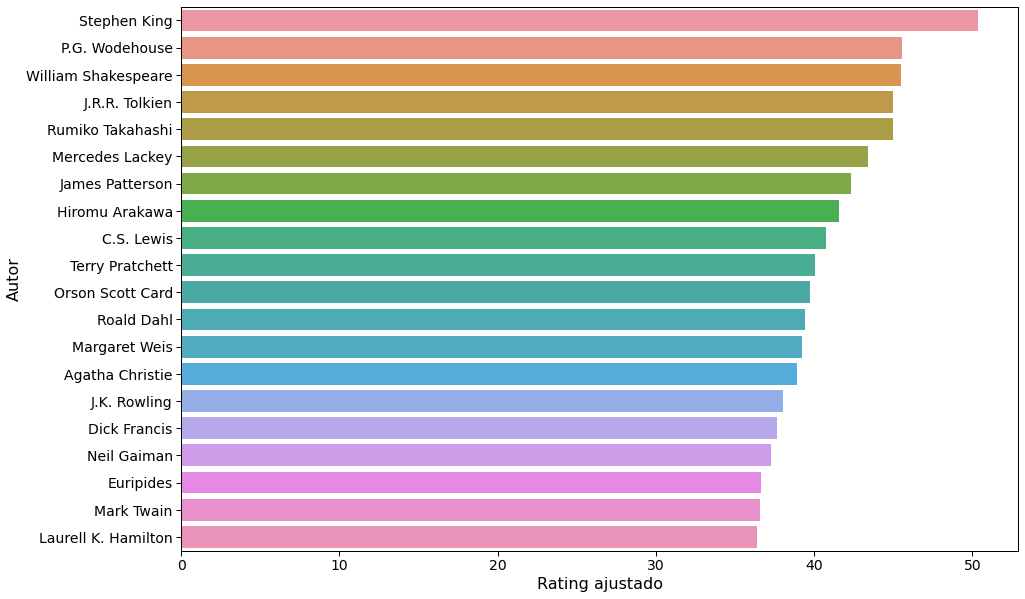

In [ ]:
#Grafico mejores autores segund adjusted_rating
fig = plt.figure( figsize= (15,10))
sns.barplot(
    y = "primer_autor",
    x = "adjusted_rating",
    data = avg_author.head(20)
)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Autor',fontsize=16)
plt.xlabel('Rating ajustado',fontsize=16)
plt.show()

In [ ]:
#DataFrame con autores por año
aux = df.groupby("año")
df_años = aux["authors"].count().reset_index()
df_años

,año,authors
0,1900,1
1,1913,1
2,1914,1
3,1919,1
4,1921,2
...,...,...
82,2016,5
83,2017,7
84,2018,5
85,2019,6


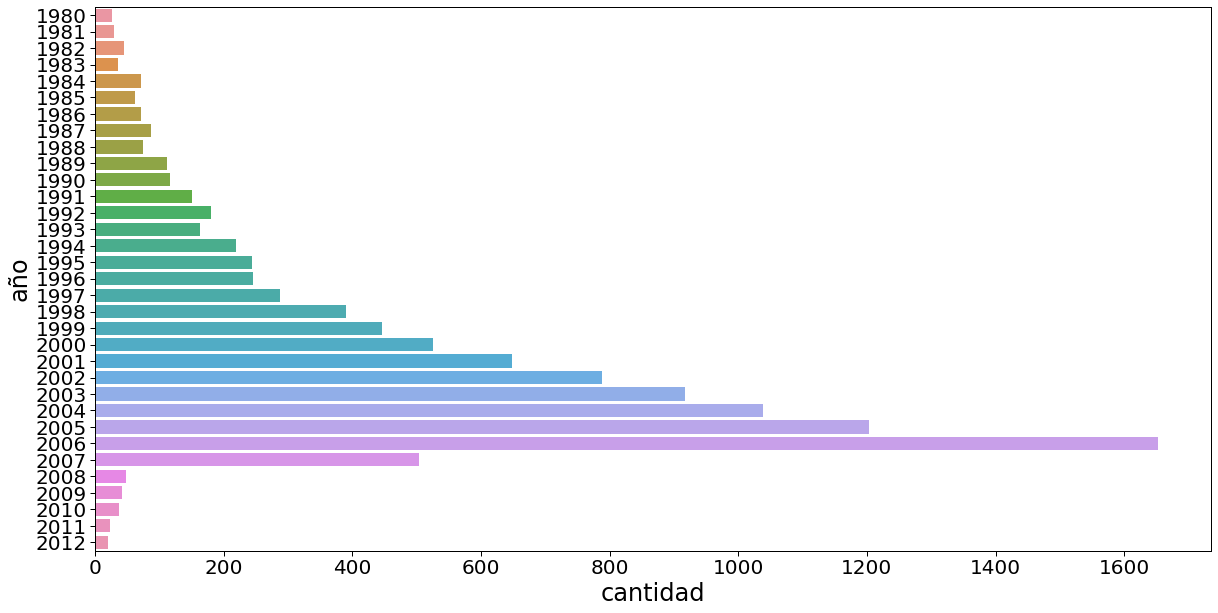

In [ ]:
#Grafico libros por año
df_años['año'] = df_años['año'].astype(int)
df_años_2 = df_años.loc[df_años['año']<=2012]
df_años_2 = df_años_2.loc[df_años['año']>=1980]
fig = plt.figure( figsize= (20,10))
sns.barplot(
    y = "año",
    x = "authors",
    data = df_años_2,
    orient = 'h'
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("cantidad",fontsize = 24)
plt.ylabel("año",fontsize = 24)
plt.show()

### 2.1 Preprocesamiento

In [ ]:
#Tomamos los datos numericos y los estandarizamos
df_numerico = df[["average_rating","año","num_pages","text_reviews_count","ratings_count"]]
scaler = StandardScaler()
df_numerico = pd.DataFrame(scaler.fit_transform(df_numerico),columns = ["average_rating","año","num_pages","text_reviews_count","ratings_count"])
df_numerico.head()

,average_rating,año,num_pages,text_reviews_count,ratings_count
0,1.814268,0.709988,1.293655,10.429122,18.291291
1,1.586424,0.468391,2.206540,11.057786,18.797362
2,1.387059,0.347592,0.037391,-0.118155,-0.104976
3,1.785788,0.468391,0.384957,13.797679,20.438726
4,2.412360,0.468391,9.827877,-0.149009,0.204026


In [ ]:
#Get_Dummies para la columna idioma
df_cat = df[["language_code"]]
df_cat = pd.get_dummies(df_cat)
df_cat

,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_gla,language_code_glg,language_code_grc,language_code_ita,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10890,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10892,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_aut = df[["codigo_autor"]]
scaler = MinMaxScaler()
df_aut = pd.DataFrame(scaler.fit_transform(df_aut),columns = ["codigo_autor"])
df_aut.head()

,codigo_autor
0,0.003333
1,0.003333
2,0.003333
3,0.003333
4,0.003333


In [ ]:
#Unimos df con datos numericos estandarizados con las columnas (ahora numericas) del idioma
df_procesado = pd.concat([df_numerico,df_cat,df_aut],axis=1)
df_procesado

,average_rating,año,num_pages,text_reviews_count,ratings_count,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,...,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho,codigo_autor
0,1.814268,0.709988,1.293655,10.429122,18.291291,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
1,1.586424,0.468391,2.206540,11.057786,18.797362,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
2,1.387059,0.347592,0.037391,-0.118155,-0.104976,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
3,1.785788,0.468391,0.384957,13.797679,20.438726,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
4,2.412360,0.468391,9.827877,-0.149009,0.204026,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,0.361759,0.468391,0.707398,-0.204548,-0.159363,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.198286
10890,0.418720,-1.464385,1.222467,-0.190663,-0.153843,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.198286
10891,0.076953,-0.860393,0.301206,-0.175621,-0.153517,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.198286
10892,-0.606581,0.830786,0.380770,-0.158651,-0.153966,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.198286


### 2.2 NearestNeighbors 

In [ ]:
#Creamos modelo vecinos mas cercanos (5)
model = NearestNeighbors(n_neighbors = 6)
fit_model = model.fit(df_procesado)
distance, indices = fit_model.kneighbors(df_procesado)
indices

array([[    0,     1,  2081,  2083,  4339,     3],
       [    1,     0,  4339,  2081,     3,  2083],
       [    2,  9764,  3048,  3053,  8733,  5093],
       ...,
       [10891,  3084,  1824,  2678,  8009, 10330],
       [10892,  6612,  9777,  5848,  9032,  9954],
       [10893,  3426, 10846, 10848,   767,  6171]])

In [ ]:
libros_prueba = [0,     #Harrypotter
                 1436,  #STephenking
                 9149,  #manga
                 787,   #pocaspaginas
                 10247  #libroviejo
]

In [ ]:
#Recomendador
for libro in libros_prueba:
  id = libro
  print(df["title"][id])
  print("Se recomienda leer: ")
  for e in indices[id]:
    if(e != id):
      print(df["title"][e])
  print('\n')

Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Se recomienda leer: 
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Animal Farm
Lord of the Flies
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)


The Drawing of the Three (The Dark Tower  #2)
Se recomienda leer: 
Lover Eternal (Black Dagger Brotherhood  #2)
Ender's Shadow (The Shadow Series  #1)
The Guardian
The Clan of the Cave Bear (Earth's Children  #1)
Murder on the Orient Express (Hercule Poirot  #10)


鋼の錬金術師 4 (Fullmetal Alchemist  #4)
Se recomienda leer: 
鋼の錬金術師 5 (Fullmetal Alchemist  #5)
鋼の錬金術師 3 (Fullmetal Alchemist  #3)
鋼の錬金術師 8 (Fullmetal Alchemist 8)
鋼の錬金術師 1 [Hagane no Renkinjutsushi 1] (Fullmetal Alchemist  #1)
彼方から 13


To Kill a Mockingbird
Se recomienda leer: 
The Glass Castle
Giraffes Can't Dance
Birthday Machine (Disney's Little Einsteins Early Reader)
The Bake Shop Ghost
The Twelve Terrors of Christmas


CliffsNotes on Sh

###2.3Otros modelos

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity 
cos_sim_1 = cosine_similarity(df_procesado.values, df_procesado.values)
np.sort(cos_sim_1[0])
indice = pd.Series(df.index, index=df['title'])
def get_recommendation_cos(idx):
    # Similaridad utilizando la métrica dada de todas los libros con respecto a la ingresada
    sim_scores = list(enumerate(cos_sim_1[idx]))

    # Ordenar de mayor a menor
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)

    # Primeros 5 puntajes
    sim_scores = sim_scores[1:6]

    # Obtener indices de las peliculas para mostrar
    movie_indices = [i[0] for i in sim_scores]

    recomendations = df['title'].iloc[movie_indices]

    df_out = pd.DataFrame(list(zip(recomendations,[x[1] for x in sim_scores])), columns=['Recomendaciones','Puntaje'], index = movie_indices)  
    return df_out
for libro in libros_prueba:
  print(get_recommendation_cos(libro),'\n')

                                        Recomendaciones   Puntaje
1     Harry Potter and the Order of the Phoenix (Har...  0.998971
585                                        Little Women  0.997236
1671                The Hobbit  or There and Back Again  0.996859
296                                 Memoirs of a Geisha  0.996469
3     Harry Potter and the Prisoner of Azkaban (Harr...  0.995917 

                                   Recomendaciones   Puntaje
4352                                  The Guardian  0.983822
8954  Lover Eternal (Black Dagger Brotherhood  #2)  0.983276
2547        Ender's Shadow (The Shadow Series  #1)  0.982810
8636          The Waste Lands (The Dark Tower  #3)  0.978341
4914  The Amber Spyglass  (His Dark Materials  #3)  0.976875 

                                        Recomendaciones   Puntaje
9150                 鋼の錬金術師 5 (Fullmetal Alchemist  #5)  0.999920
9152                   鋼の錬金術師 8 (Fullmetal Alchemist 8)  0.998401
9151                 鋼の錬金術師 3 (Fullm

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
sigmoid_1 = sigmoid_kernel(df_procesado.values, df_procesado.values)
def get_recommendation_sig(idx):
    # Similaridad utilizando la métrica dada de todos los libros con respecto a la ingresada
    sim_scores = list(enumerate(sigmoid_1[idx]))

    # Ordenar de mayor a menor
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)

    # Primeros 5 puntajes
    sim_scores = sim_scores[1:6]

    # Obtener indices de las peliculas para mostrar
    movie_indices = [i[0] for i in sim_scores]

    recomendations = df['title'].iloc[movie_indices]

    df_out = pd.DataFrame(list(zip(recomendations,[x[1] for x in sim_scores])), columns=['Recomendaciones','Puntaje'], index = movie_indices)  
    return df_out
for libro in libros_prueba:
  print(get_recommendation_sig(libro),'\n')

                                         Recomendaciones  Puntaje
5173                                      The Book Thief      1.0
10124                            Twilight (Twilight  #1)      1.0
1671                 The Hobbit  or There and Back Again      1.0
3      Harry Potter and the Prisoner of Azkaban (Harr...      1.0
4339   Harry Potter and the Chamber of Secrets (Harry...      1.0 

                                        Recomendaciones   Puntaje
5173                                     The Book Thief  0.998662
1439                             The Catcher in the Rye  0.994769
1053                          The Giver (The Giver  #1)  0.994537
281                                       The Alchemist  0.994087
7136  The Lightning Thief (Percy Jackson and the Oly...  0.993290 

                                         Recomendaciones   Puntaje
4702   The Diamond Color Meditation: Color Pathway to...  0.837758
774                    Willem de Kooning: Late Paintings  0.837510
842

In [ ]:
get_recommendation_sig(6661)

,Recomendaciones,Puntaje
9927,Day and Night,0.846644
5223,Canopy: A Work for Voice and Light in Harvard ...,0.846177
3432,Brodie's notes on Aldous Huxley's brave new world,0.845200
10800,Anthony Thwaite: In Conversation With Peter Da...,0.844888
369,Juiced Official Strategy Guide,0.844873


## **4**. **CODIGO**
Sección para probar códigos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomTreesEmbedding
#from sklearn.neural_network import BernoulliRBM
#.

In [ ]:
# read data

df = pd.read_csv("books.csv",error_bad_lines=False)
df.head()
#.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
# Ver los idiomas de los libros

np.unique(df["language_code"])
#.

array(['ale', 'ara', 'en-CA', 'en-GB', 'en-US', 'eng', 'enm', 'fre',
       'ger', 'gla', 'glg', 'grc', 'ita', 'jpn', 'lat', 'msa', 'mul',
       'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur', 'wel',
       'zho'], dtype=object)

In [ ]:
# Compactificar idiomas

df.loc[df["language_code"]=="en-CA","language_code"] = "eng"
df.loc[df["language_code"]=="en-GB","language_code"] = "eng"
df.loc[df["language_code"]=="en-US","language_code"] = "eng"
np.unique(df["language_code"])
#.

array(['ale', 'ara', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc',
       'ita', 'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus',
       'spa', 'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

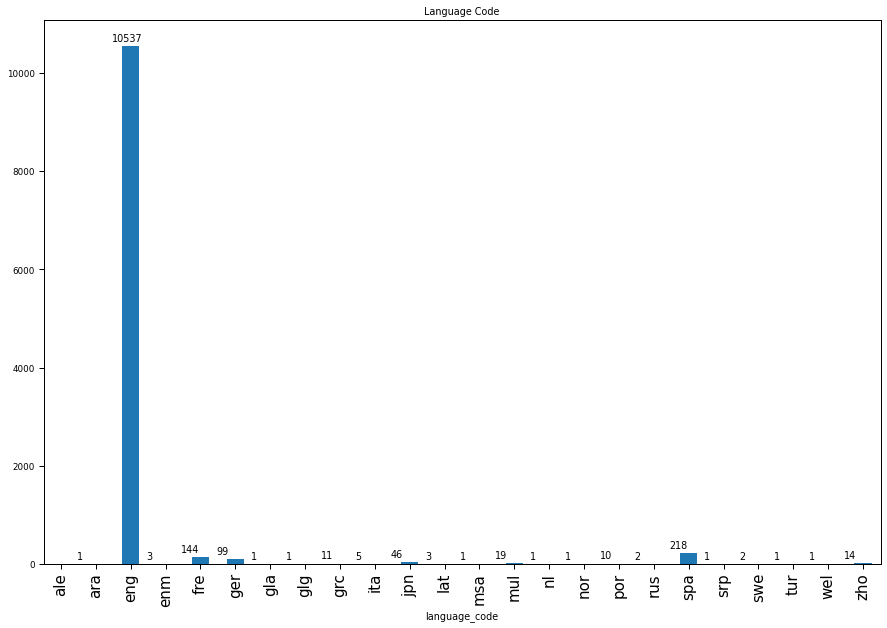

In [ ]:
# Grafico de cant de libros vs idioma

sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))
#.

In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
# Eliminar espacios de los nombres de las columnas
df.columns = df.columns.str.strip()
#.

In [ ]:
# Crear dataframe con libros not a book

df_not_a_book = df.loc[df['authors']=="NOT A BOOK"]
#.

In [ ]:
# Ver las editoriales de df_audios

a = np.unique(df_not_a_book["publisher"])
a.shape
#.

(3,)

In [ ]:
# Crear dataframe con libros con numero de paginas menor a 5
# consejo: visualizar cuantos tienen menos de 5 pag

df_libro_chiquito = df.loc[df['num_pages']<5]
np.unique(df_libro_chiquito["publisher"])
#.

array(['Addison Wesley Publishing Company', 'Audio Literature',
       'Audio Partners', 'Audio Renaissance', 'AudioGO', 'AudioText',
       'Audiogo', 'BBC Audiobooks', 'BBC Audiobooks Ltd',
       'BBC Physical Audio', 'BBC Worldwide', 'Ballantine Books',
       'Basic Books', 'Blackstone Audiobooks', 'Brilliance Audio',
       'Caedmon', 'Canadian Broadcasting Corporation (CBC Audio)',
       'Fawcett', 'Fawcett Coventry', 'Gold Eagle',
       'Grand Central Publishing', 'Hachette Audio', 'HarperAudio',
       'HarperCollins Publishers', 'HarperFestival', 'Hay House',
       'Hodder Audio', 'Ivy Books', 'Knopf', 'Knowledge Products',
       'Listening Library (Audio)', 'MacMillan Audio', 'Macmillan Audio',
       'Mariner Books', 'Moody Publishers', 'Naxos Audiobooks',
       'Nova Audio Books', 'Planeta Publishing', 'Prentice Hall',
       'Puffin', 'Puffin Audiobooks', 'RH Audio', 'RH Audio Price-less',
       'Random House Audio', 'Random House Audio Publishing Group',
       'Ra

In [ ]:
# Crear dataframe con los que son libros segun nuestros parametros
df_libros = df.loc[df['num_pages']>=5]
df_libros = df_libros[~df_libros['publisher'].str.contains("Audio",case=False)]
#df = df.loc["audio" in df['publisher']]
df_libros = df_libros.reset_index()
#.

<Figure size 1080x720 with 0 Axes>

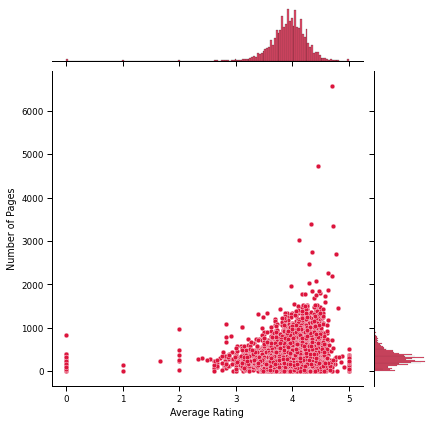

In [ ]:
# Grafico de numero de paginas vs nota promedio

plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")
#.

<Figure size 1080x720 with 0 Axes>

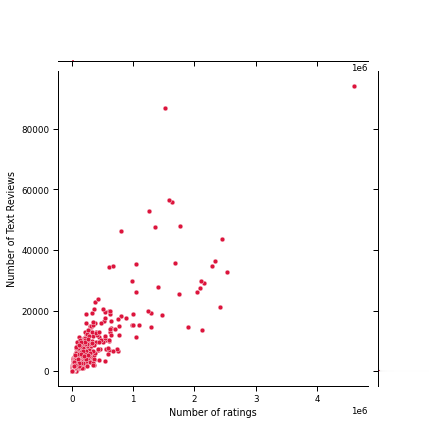

In [ ]:
# Grafico de cantidad de reseñas vs cantidad de votos

plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="ratings_count", y="text_reviews_count", data = df, color = 'crimson')
ax.set_axis_labels("Number of ratings", "Number of Text Reviews")
#.

In [ ]:
# Se define una funcion para identificar el primer autor

def primer_autor(text):
    arr = text.split('/')
    return arr[0]
# Se crea una nueva columna con el primer autor
df['primer_autor'] = df['authors'].apply(lambda x : primer_autor(x))

total_rating = df.drop_duplicates(subset=['primer_autor', 'title'], keep='first')
total_rating = total_rating.groupby(by=['primer_autor']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating
#.

,primer_autor,total_rating
3753,Stephen King,250.79
3006,P.G. Wodehouse,187.31
4161,William Shakespeare,178.45
1603,J.R.R. Tolkien,172.22
3536,Rumiko Takahashi,163.28
...,...,...
146,Andrew Hunt,0.00
1654,James Craig Holte,0.00
1751,Jasmine C.M. Luk,0.00
935,Dobrica Erić,0.00


In [ ]:
total_book = df.groupby(by=['primer_autor']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book
#.

,primer_autor,total_book
3753,Stephen King,63
4161,William Shakespeare,45
3006,P.G. Wodehouse,45
29,Agatha Christie,41
1603,J.R.R. Tolkien,41
...,...,...
1727,Jane Parker Resnick,1
1729,Jane Robins,1
1731,Jane Walmsley,1
1732,Jane Werner Watson,1


In [ ]:
avg_author = pd.merge(total_book, total_rating, on='primer_autor', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] >0]
avg_author['adjusted_rating'] = avg_author['average_rating']*(avg_author['total_book']+20*avg_author['total_book'].mean())/20*avg_author['total_book'].mean()
avg_author = avg_author.sort_values(by=['adjusted_rating'], ascending=False)
avg_author.head(10)
#.

,primer_autor,total_book,total_rating,average_rating,adjusted_rating
0,Stephen King,63,250.79,3.98,55.324002
2,P.G. Wodehouse,45,187.31,4.16,48.569574
4,J.R.R. Tolkien,41,172.22,4.20,46.959806
1,William Shakespeare,45,178.45,3.97,46.351252
7,Rumiko Takahashi,39,163.28,4.19,45.812078
6,Mercedes Lackey,40,160.11,4.00,44.229153
3,Agatha Christie,41,161.82,3.95,44.164580
5,James Patterson,41,159.91,3.90,43.605535
22,Hiromu Arakawa,26,118.42,4.55,42.436193
9,Roald Dahl,35,141.66,4.05,42.278752


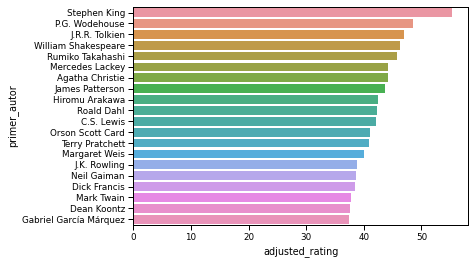

In [ ]:
sns.barplot(
    y = "primer_autor",
    x = "adjusted_rating",
    data = avg_author.head(20)
)
#.

In [ ]:
codigo_autor = {}
c = 0 

for autor in avg_author["primer_autor"]:
  codigo_autor[autor] = c
  c+=1
codigo_autor
for autor in codigo_autor:
  df.loc[df["primer_autor"]==autor,"codigo_autor"] = codigo_autor[autor]

In [ ]:

df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,primer_autor,codigo_autor
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,14.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,14.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,J.K. Rowling,14.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,J.K. Rowling,14.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,J.K. Rowling,14.0


In [ ]:
fechas_buenas = []
for i in range(df.shape[0]):
  fecha = df["publication_date"][i].split("/")
  if len(fecha[0])==1:
    fecha[0] = "0"+fecha[0]
  if len(fecha[1])==1:
    fecha[1] = "0"+fecha[1]
  fechas_buenas.append(fecha[2])
df["año"] = fechas_buenas
#.

In [ ]:
df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,primer_autor,codigo_autor,año
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,14.0,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,14.0,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,J.K. Rowling,14.0,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,J.K. Rowling,14.0,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,J.K. Rowling,14.0,2004


In [ ]:
np.unique(df["año"])

array(['1900', '1913', '1914', '1919', '1921', '1922', '1923', '1925',
       '1928', '1929', '1931', '1935', '1940', '1943', '1947', '1948',
       '1949', '1950', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [ ]:
grupo = df.groupby("año")
anios = grupo["authors"].count().reset_index()
anios
#.

,año,authors
0,1900,1
1,1913,1
2,1914,1
3,1919,1
4,1921,2
...,...,...
82,2016,6
83,2017,7
84,2018,5
85,2019,6


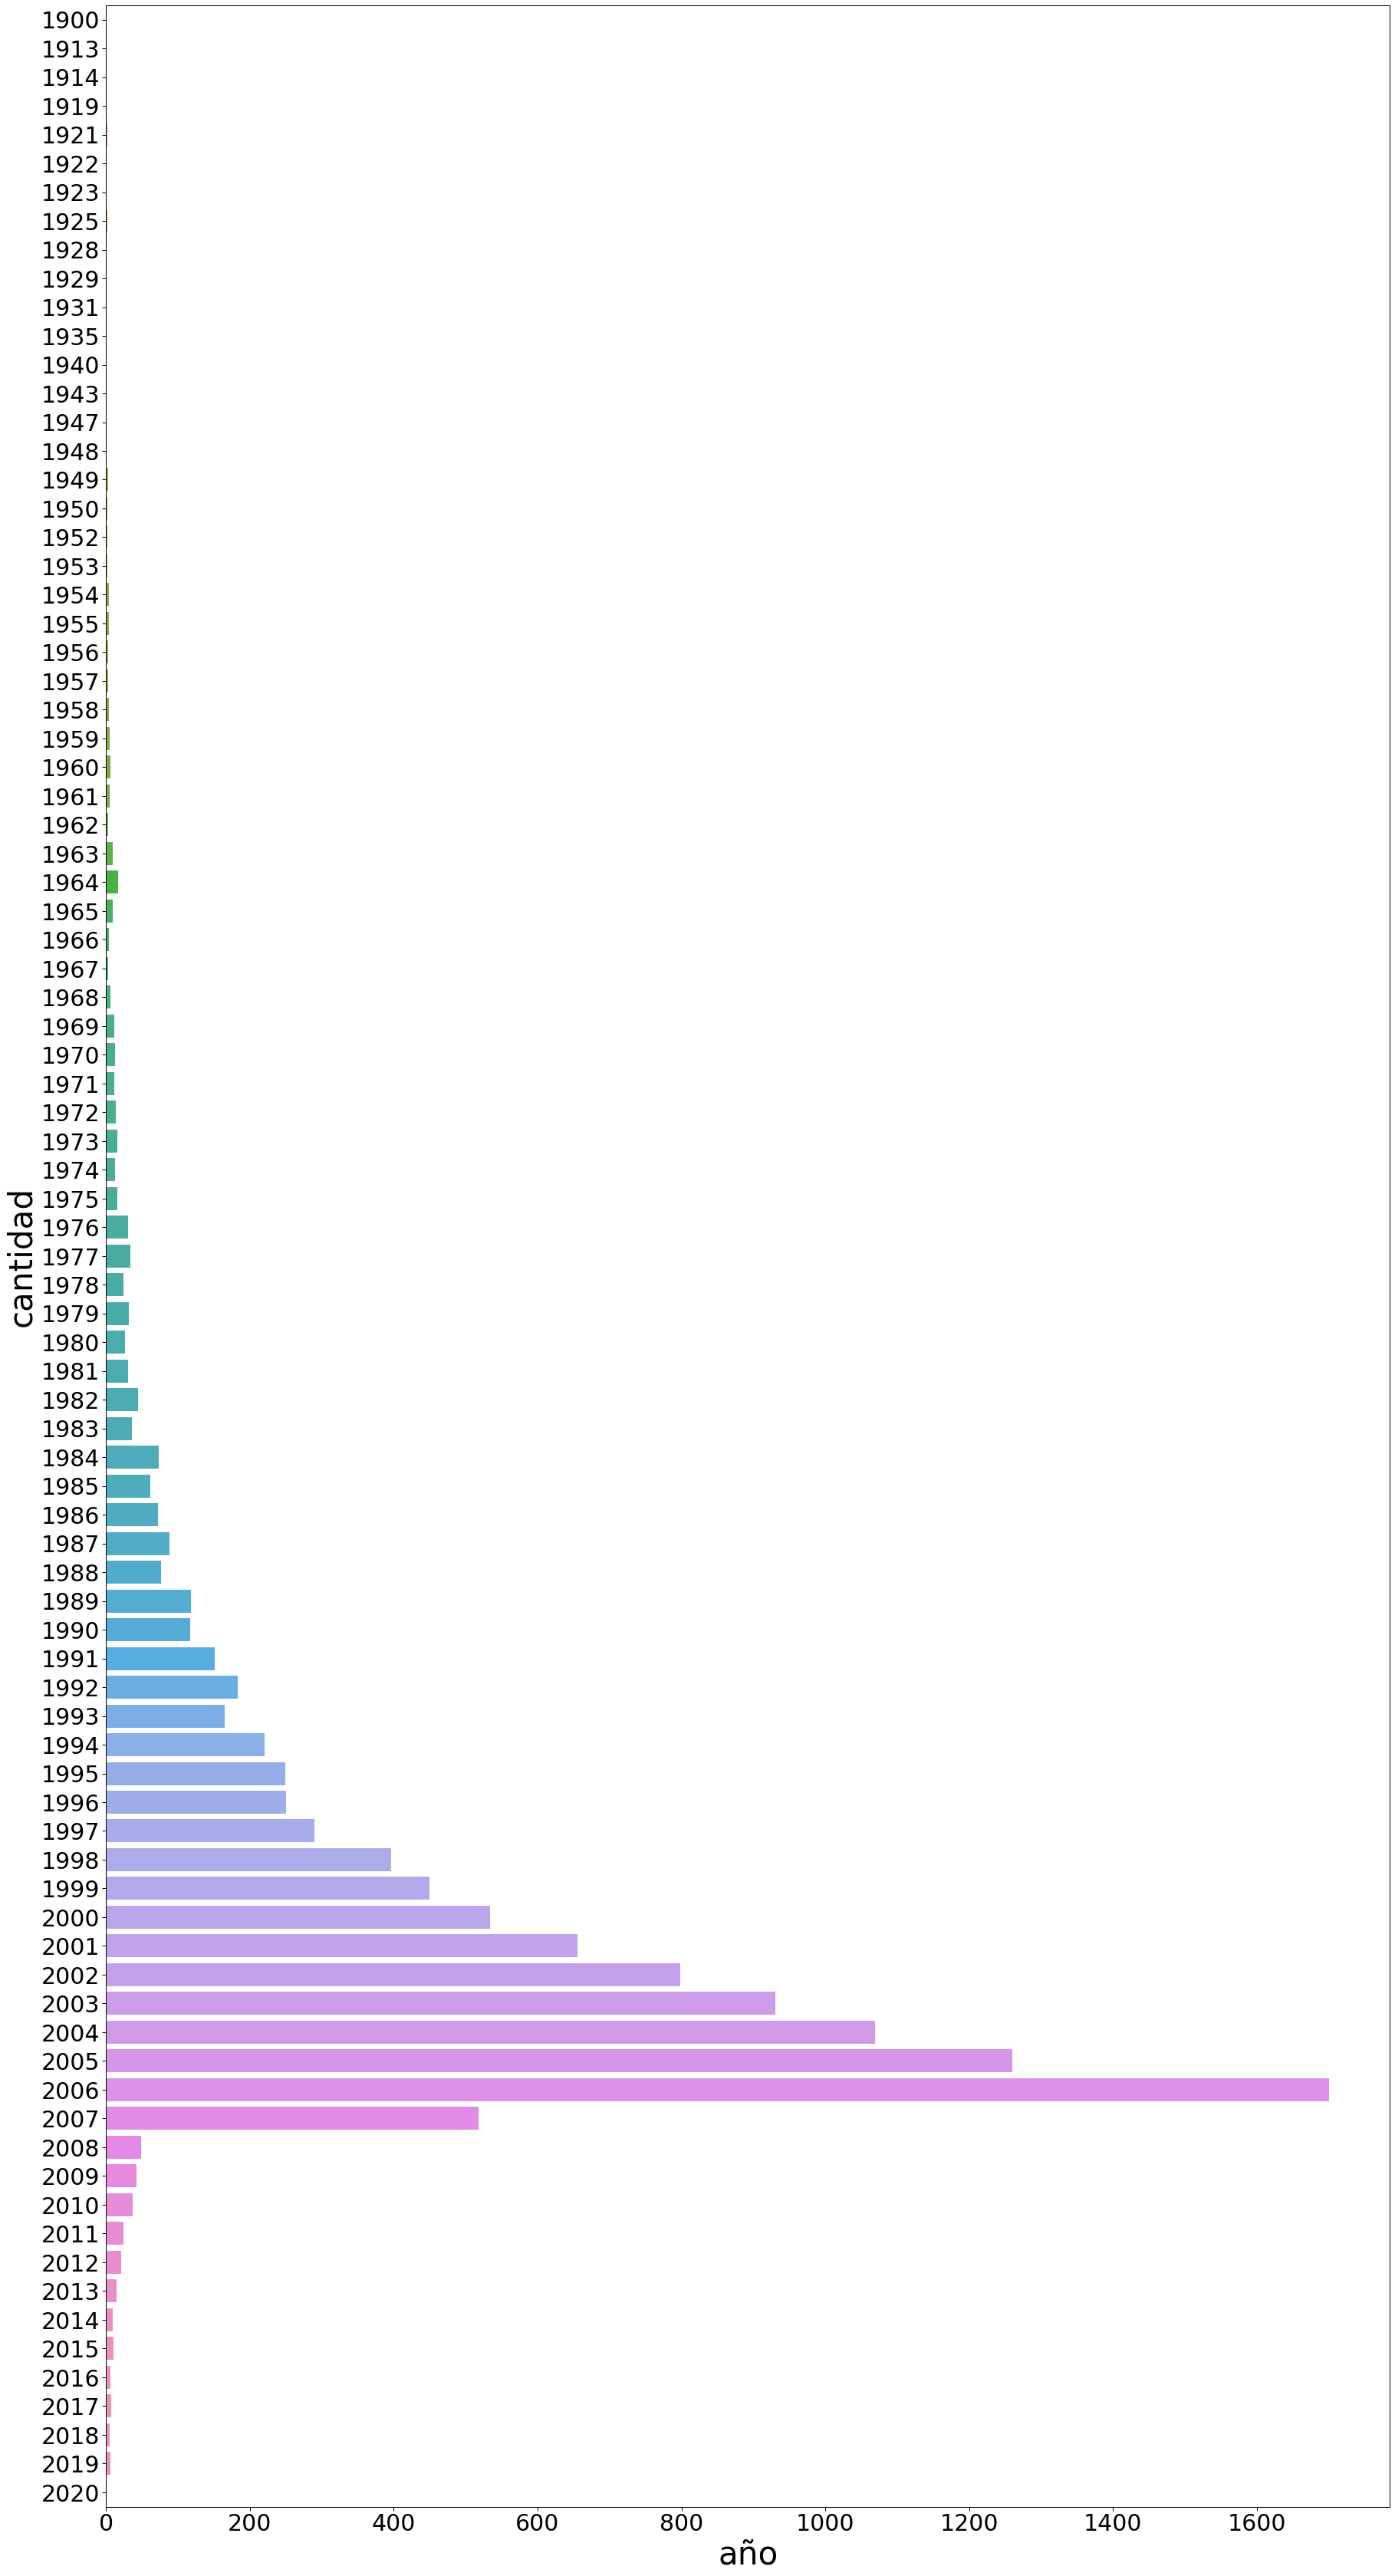

In [ ]:
fig = plt.figure( figsize= (30,60))
sns.barplot(
    y = "año",
    x = "authors",
    data = anios
)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("año",fontsize = 42)
plt.ylabel("cantidad",fontsize = 42)
plt.show()
#.

In [ ]:
df_numerico = df[["average_rating","año","num_pages","text_reviews_count","ratings_count"]]
scaler = StandardScaler() #estandarizamos los datos
df_numerico = pd.DataFrame(scaler.fit_transform(df_numerico),columns = ["average_rating","año","num_pages","text_reviews_count","ratings_count"])
df_numerico.head()
#.

,average_rating,año,num_pages,text_reviews_count,ratings_count
0,1.814493,0.707055,1.308751,10.498316,18.469833
1,1.586228,0.464538,2.212783,11.130957,18.980766
2,1.386496,0.343280,0.064669,-0.115679,-0.103204
3,1.785960,0.464538,0.408865,13.888182,20.637902
4,2.413689,0.464538,9.760210,-0.146729,0.208768


In [ ]:
df_aut = df[["codigo_autor"]]
scaler = MinMaxScaler()
df_aut = pd.DataFrame(scaler.fit_transform(df_aut),columns = ["codigo_autor"])
df_aut.head()

,codigo_autor
0,0.003322
1,0.003322
2,0.003322
3,0.003322
4,0.003322


In [ ]:
df_cat = df[["language_code"]]
df_cat = pd.get_dummies(df_cat)
df_cat
#.

,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_gla,language_code_glg,language_code_grc,language_code_ita,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_procesado = pd.concat([df_numerico,df_cat,df_aut],axis=1)
df_procesado
#.

,average_rating,año,num_pages,text_reviews_count,ratings_count,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,...,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho,codigo_autor
0,1.814493,0.707055,1.308751,10.498316,18.469833,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003322
1,1.586228,0.464538,2.212783,11.130957,18.980766,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003322
2,1.386496,0.343280,0.064669,-0.115679,-0.103204,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003322
3,1.785960,0.464538,0.408865,13.888182,20.637902,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003322
4,2.413689,0.464538,9.760210,-0.146729,0.208768,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0.359303,0.464538,0.728179,-0.202619,-0.158114,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.204794
11119,0.416369,-1.475595,1.238253,-0.188646,-0.152540,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.204794
11120,0.073971,-0.869303,0.325926,-0.173510,-0.152211,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.204794
11121,-0.610824,0.828313,0.404718,-0.156432,-0.152664,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.204794


In [ ]:
model = NearestNeighbors(n_neighbors = 6)
fit_model = model.fit(df_procesado)
distance, indices = fit_model.kneighbors(df_procesado)
indices
#.

array([[    0,     1,  2114,  2116,  4415,     3],
       [    1,     0,  4415,  2114,     3,  2116],
       [    2,  9970,  3105,  3110,  8925,  5190],
       ...,
       [11120,  3141,  1852,  2724,  8195, 10544],
       [11121,  6781,  9983,  6010,  9230, 10165],
       [11122,  3485, 11073, 11075,   779,  6336]])

In [ ]:
indices.shape

(11123, 6)

In [ ]:
df["title"][11122]

'Las aventuras de Tom Sawyer'

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity 
cos_sim_1 = cosine_similarity(df_procesado.values, df_procesado.values)
np.sort(cos_sim_1[0])

array([-0.25201375, -0.24627002, -0.24535935, ...,  0.99729613,
        0.99900304,  1.        ])

In [ ]:
indice = pd.Series(df.index, index=df['title'])
def get_recommendation_cos(title):
    idx = indice[title]
    if idx.shape != ():
      idx = idx[0]
    # Similaridad utilizando la métrica dada de todas las películas con respecto a la ingresada
    sim_scores = list(enumerate(cos_sim_1[idx]))
    # Ordenar de mayor a menor

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)

    # Primeros 10 puntajes
    
    sim_scores = sim_scores[1:6]

    # Obtener indices de las peliculas para mostrar
    movie_indices = [i[0] for i in sim_scores]

    recomendations = df['title'].iloc[movie_indices]

    df_out = pd.DataFrame(list(zip(recomendations,[x[1] for x in sim_scores])), columns=['Recomendaciones','Puntaje'], index = movie_indices)  
    return df_out
get_recommendation_cos('Las aventuras de Tom Sawyer')

,Recomendaciones,Puntaje
3485,Carrie,0.987797
11073,Artemis Fowl (Artemis Fowl #1),0.986838
11075,Encuentro en el Ártico (Artemis Fowl #2),0.980355
779,Las intermitencias de la muerte,0.971009
6336,Noticia de un secuestro,0.969142


In [ ]:
df_publisher = df0[["title","num_pages", "publisher"]]
df_publisher2 = df_publisher.loc[df_publisher['num_pages']<5]
df_publisher2.head()

,title,num_pages,publisher
306,The 5 Love Languages / The 5 Love Languages Jo...,0,Moody Publishers
324,The Richest Man in Babylon,4,Recorded Books Inc.
370,Men Are from Mars Women Are from Venus,2,HarperAudio
636,The Long Goodbye (Philip Marlowe #6),2,BBC Worldwide
673,The Old Man and the Sea,3,Simon Schuster Audio
